# 2.2 PATH

# shortest paths via the breadth-first search algorithm.

In [2]:
from nams import load_data as cf
G = cf.load_sociopatterns_network()

In [4]:
from nams.solutions.paths import bfs_algorithm
bfs_algorithm()

In [8]:
def path_exists(node1, node2, G):
    """
    This function checks whether a path exists between two nodes (node1, 
    node2) in graph G.
    """
    visited_nodes = {}
    queue = [node1]

    while len(queue) > 0:
        node = queue.pop()
        neighbors = list(G.neighnors(node))
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
        else:
            visited_nodes.add(node)
            nbrs = [nb for nb in neighbors if nb not in visited_nodes]
            queue = queue + nbrs

    print('Path does not exist between nodes {0} and {1}'.format(node1, node2))
    return False

In [9]:
from nams.solutions.paths import path_exists
path_exists??

Signature: path_exists(node1, node2, G)
Source:   
def path_exists(node1, node2, G):
    """
    This function checks whether a path exists between two nodes (node1,
    node2) in graph G.
    """

    visited_nodes = set()
    queue = [node1]

    while len(queue) > 0:
        node = queue.pop()
        neighbors = list(G.neighbors(node))
        if node2 in neighbors:
            return True
        else:
            visited_nodes.add(node)
            nbrs = [n for n in neighbors if n not in visited_nodes]
            queue = nbrs + queue

    return False
File:      ~/nams/solutions/paths.py
Type:      function


In [15]:
from random import sample
import networkx as nx


def test_path_exists(N):
    """
    N: The number of times to spot-check.
    """
    for i in range(N):
        n1, n2 = sample(G.nodes(), 2)
        assert path_exists(n1, n2, G) == bool(nx.shortest_path(G, n1, n2))
    return True

assert test_path_exists(10)

/tmp/ipykernel_61/2924339583.py:10: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  n1, n2 = sample(G.nodes(), 2)


# extract subgraphs from a larger graph.

In [16]:
# from Graph G - source to destination
path = nx.shortest_path(G, 7, 400)
path

[7, 51, 188, 230, 335, 400]

<AxesSubplot:>

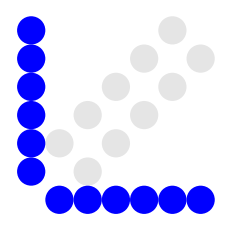

In [17]:
import nxviz as nv
g = G.subgraph(path)
nv.matrix(g, sort_by="order")

<AxesSubplot:>

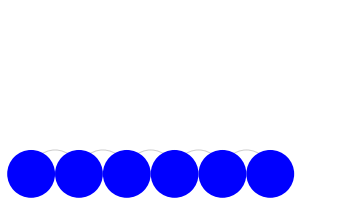

In [36]:
nv.arc(g, sort_by="order")

In [19]:
g.add_node(2048)
# Error
# because g is sub-graph so, no allow to add any nodes 

NetworkXError: Frozen graph can't be modified

In [20]:
from nams.solutions.paths import plot_path_with_neighbors

In [22]:
def plot_path_with_neighbors(G, n1, n2):
    """Plot a path with the heighbors of of the nodes along that path."""
    path = nx.shortest_path(G, n1, n2)
    nodes = [*path]
    for node in path:
        nodes.extend(list(G.neighbors(node)))
    nodes = list(set(nodes))

    g = G.subgraph(nodes)
    nv.arc(
        g, sort_by="order", node_color_by="order", edge_enc_kwargs={"alpha_scale": 0.5}
    )
    for n in path:
        highlights.arc_node(g, n, sort_by="order")
    for n1, n2 in zip(path[:-1], path[1:]):
        highlights.arc_edge(g, n1, n2, sort_by="order")

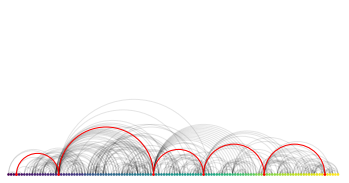

In [21]:
plot_path_with_neighbors(G, 7, 400)

# betweenness centrality and correlation with degree centrality

In [23]:
import pandas as pd
pd.Series(nx.betweenness_centrality(G))

100    0.014809
101    0.001398
102    0.000748
103    0.006735
104    0.001198
         ...   
89     0.000004
91     0.006415
96     0.000323
99     0.000322
98     0.000000
Length: 410, dtype: float64

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
def plot_degree_betweenness(G):
    """Plot scatterplot between degree and betweenness centrality."""
    bc = pd.Series(nx.betweenness_centrality(G))
    dc = pd.Series(nx.degree_centrality(G))

    df = pd.DataFrame(dict(bc=bc, dc=dc))
    ax = df.plot(x="dc", y="bc", kind="scatter")
    ax.set_ylabel("Betweenness\nCentrality")
    ax.set_xlabel("Degree Centrality")
    sns.despine() # remove border top and right

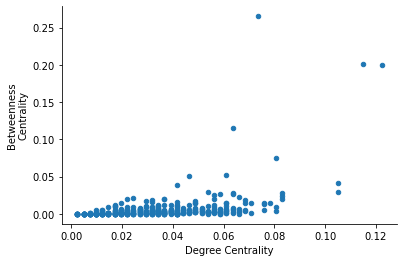

In [33]:
# from nams.solutions.paths import plot_degree_betweenness
plot_degree_betweenness(G)

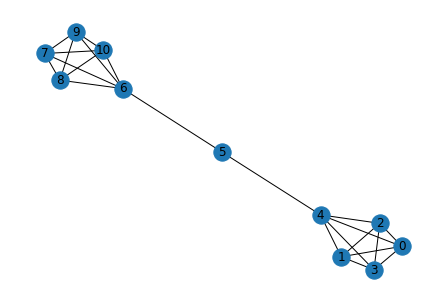

In [37]:
nx.draw(nx.barbell_graph(5, 1), with_labels = True)

In [ ]:
node i=5 describe the example of high betweeness but low degree centrality